In [64]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import mplfinance as mpf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [65]:
# !pip install mplfinance

In [117]:
# mount and read data and assigned to df
df = pd.read_csv("SJLIC.csv")

In [118]:
df.head()

,BUSINESS DATE,CLOSE PRICE,HIGH PRICE,LOW PRICE,TOTAL TRADED QUANTITY,TOTAL TRADED VALUE,TOTAL TRADES
0,2025-01-28,447.2,450.0,446.0,43130,19308660.7,416
1,2025-01-27,450.0,455.0,448.0,22112,9960068.5,308
2,2025-01-26,454.0,460.0,453.1,22257,10130604.6,282
3,2025-01-23,457.5,466.1,455.0,30043,13799480.2,378
4,2025-01-22,459.5,463.9,446.1,52064,23833357.1,511


In [146]:
# statistical details of numeric cloumns
df.describe()

,CLOSE PRICE,HIGH PRICE,LOW PRICE,TOTAL TRADED QUANTITY,TOTAL TRADED VALUE,TOTAL TRADES
count,19.000000,19.000000,19.000000,19.000000,1.900000e+01,19.000000
mean,450.268421,455.931579,445.247368,25891.421053,1.166990e+07,296.578947
std,5.661179,6.950624,4.918488,10692.469948,4.884224e+06,79.735198
min,440.000000,445.000000,436.500000,11497.000000,5.111802e+06,194.000000
25%,445.550000,451.000000,441.800000,18634.000000,8.340668e+06,243.500000
50%,449.000000,455.000000,445.000000,22302.000000,1.013060e+07,282.000000
75%,454.500000,461.500000,448.050000,30101.000000,1.379882e+07,329.500000
max,459.500000,466.800000,455.000000,52064.000000,2.383336e+07,511.000000


In [52]:
# rows and columns count
df.shape

(19, 7)

In [56]:
# not null count and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BUSINESS DATE          19 non-null     object 
 1   CLOSE PRICE            19 non-null     float64
 2   HIGH PRICE             19 non-null     float64
 3   LOW PRICE              19 non-null     float64
 4   TOTAL TRADED QUANTITY  19 non-null     int64  
 5   TOTAL TRADED VALUE     19 non-null     float64
 6   TOTAL TRADES           19 non-null     int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 1.2+ KB


In [54]:
# calculate the count of unique values in each column of a DataFrame 
df.nunique()

BUSINESS DATE            19
CLOSE PRICE              17
HIGH PRICE               15
LOW PRICE                18
TOTAL TRADED QUANTITY    19
TOTAL TRADED VALUE       19
TOTAL TRADES             18
dtype: int64

In [55]:
#categorical columns
categorical_columns = df.select_dtypes(exclude=['float64', 'int64']).head()
categorical_columns

,BUSINESS DATE
0,2025-01-28
1,2025-01-27
2,2025-01-26
3,2025-01-23
4,2025-01-22


In [56]:
# numerical data
numerical_columns = df.select_dtypes(include=['float64', 'int64']).head()
numerical_columns

,CLOSE PRICE,HIGH PRICE,LOW PRICE,TOTAL TRADED QUANTITY,TOTAL TRADED VALUE,TOTAL TRADES
0,447.2,450.0,446.0,43130,19308660.7,416
1,450.0,455.0,448.0,22112,9960068.5,308
2,454.0,460.0,453.1,22257,10130604.6,282
3,457.5,466.1,455.0,30043,13799480.2,378
4,459.5,463.9,446.1,52064,23833357.1,511


# Feature Extraction

In [81]:
# Ensure BUSINESS DATE is in datetime format
df['BUSINESS DATE'] = pd.to_datetime(df['BUSINESS DATE'])

# Extract the day and month
df['DAY'] = df['BUSINESS DATE'].dt.day
df['MONTH'] = df['BUSINESS DATE'].dt.month
df['YEAR'] = df['BUSINESS DATE'].dt.year

# Display the updated DataFrame
# print(df.head())

In [82]:
df['CLOSE PRICE']

0     447.2
1     450.0
2     454.0
3     457.5
4     459.5
5     451.0
6     448.0
7     449.0
8     445.0
9     446.0
10    444.0
11    449.0
12    455.0
13    459.0
14    457.7
15    453.1
16    445.1
17    445.0
18    440.0
Name: CLOSE PRICE, dtype: float64

# Data Visualization

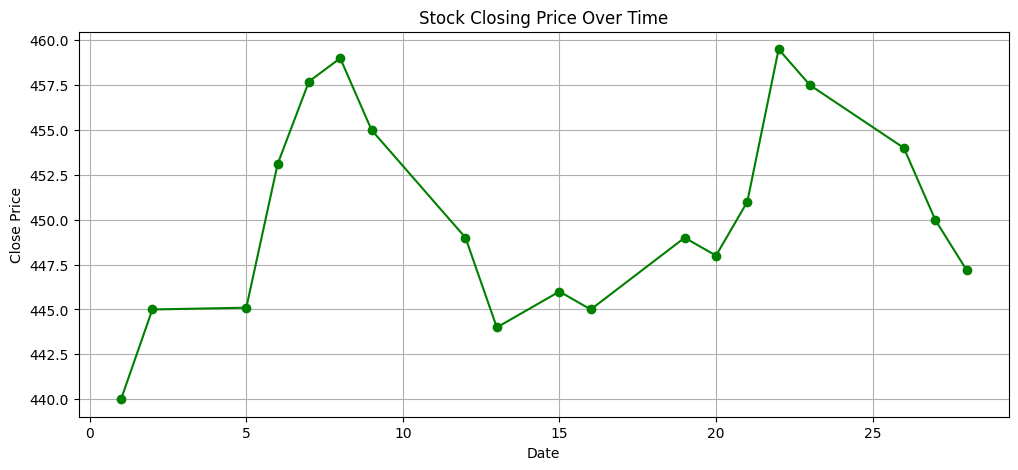

In [61]:
plt.figure(figsize=(12, 5))
plt.plot(df["DAY"], df["CLOSE PRICE"], marker='o', color='g')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Stock Closing Price Over Time")
plt.grid()
plt.show()

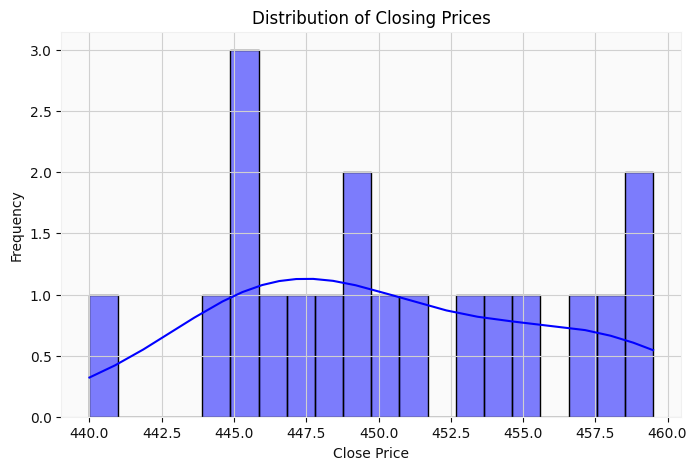

In [100]:
plt.figure(figsize=(8, 5))
sns.histplot(df["CLOSE PRICE"], bins=20, kde=True, color='blue')
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.title("Distribution of Closing Prices")
plt.show()

In [122]:
df = df.sort_values(by="BUSINESS DATE", ascending=True)

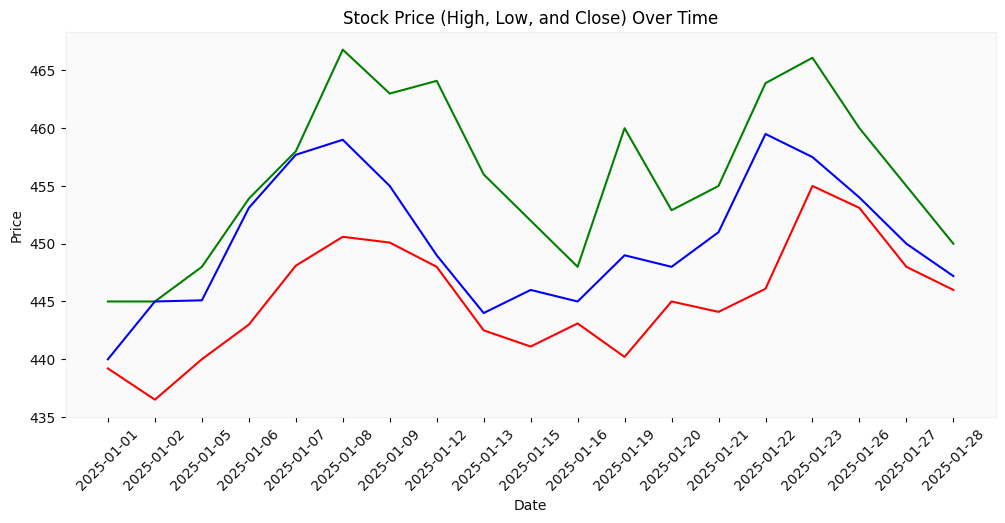

In [123]:
plt.figure(figsize=(12, 5))
plt.plot(df["BUSINESS DATE"], df["HIGH PRICE"], linestyle='-', color='g', label='High Price')
plt.plot(df["BUSINESS DATE"], df["LOW PRICE"], linestyle='-', color='r', label='Low Price')
plt.plot(df["BUSINESS DATE"], df["CLOSE PRICE"], linestyle='-', color='b', label='Close Price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Price (High, Low, and Close) Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()

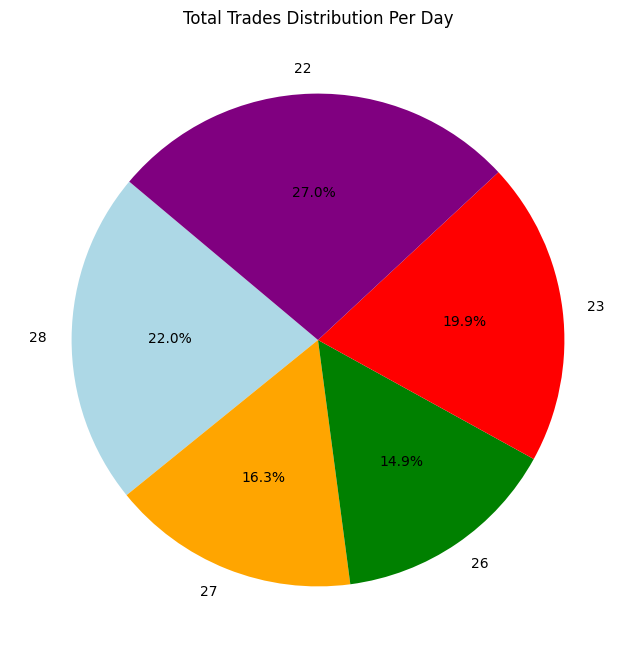

In [262]:
# Sample data (replace with your actual dataframe)
days = ["28", "27", "26", "23", "22"]
total_trades = [416, 308, 282, 378, 511]

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_trades, labels=days, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'orange', 'green', 'red', 'purple'])
plt.title("Total Trades Distribution Per Day")
plt.show()

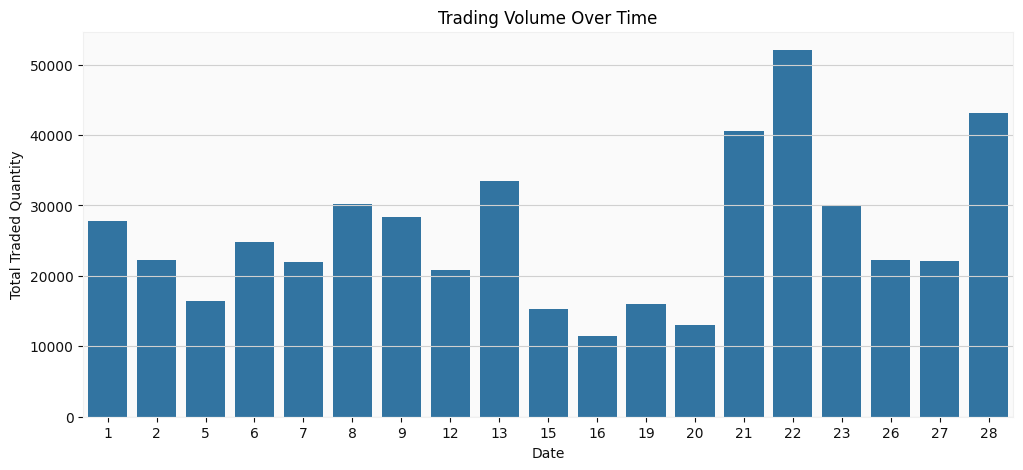

In [83]:
plt.figure(figsize=(12, 5))
sns.barplot(x="DAY", y="TOTAL TRADED QUANTITY", data=df)
plt.xlabel("Date")
plt.ylabel("Total Traded Quantity")
plt.title("Trading Volume Over Time")
plt.show()

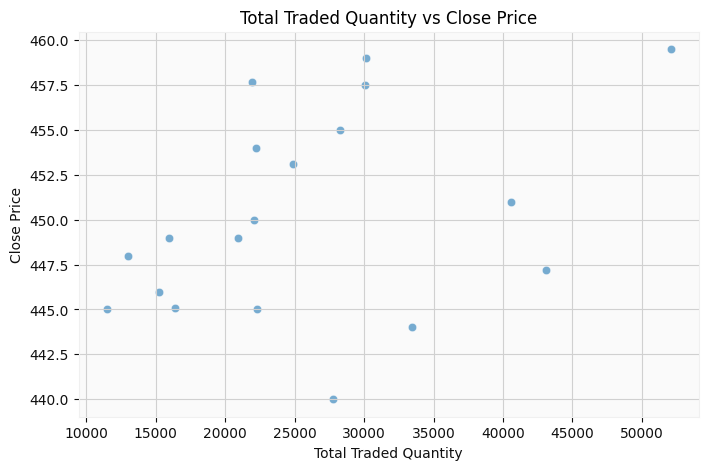

In [153]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["TOTAL TRADED QUANTITY"], y=df["CLOSE PRICE"], alpha=0.6)
plt.xlabel("Total Traded Quantity")
plt.ylabel("Close Price")
plt.title("Total Traded Quantity vs Close Price")
plt.show()

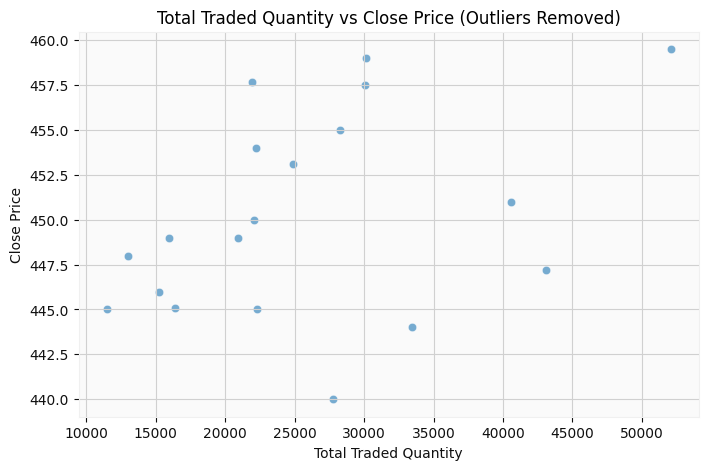

In [87]:
# Compute Z-scores
z_scores = stats.zscore(df[["TOTAL TRADED QUANTITY", "CLOSE PRICE"]])

# Define threshold (e.g., 3 standard deviations)
threshold = 3
df_filtered = df[(abs(z_scores) < threshold).all(axis=1)]

# Plot again without outliers
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_filtered["TOTAL TRADED QUANTITY"], y=df_filtered["CLOSE PRICE"], alpha=0.6)
plt.xlabel("Total Traded Quantity")
plt.ylabel("Close Price")
plt.title("Total Traded Quantity vs Close Price (Outliers Removed)")
plt.show()

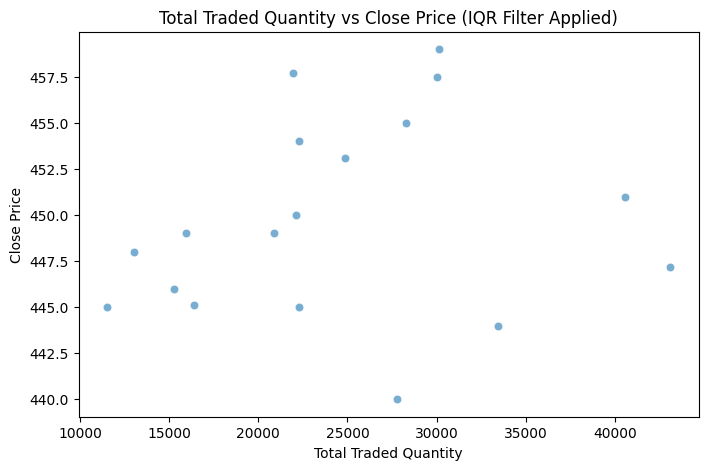

In [36]:
Q1 = df["TOTAL TRADED QUANTITY"].quantile(0.25)
Q3 = df["TOTAL TRADED QUANTITY"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df[(df["TOTAL TRADED QUANTITY"] >= lower_bound) & (df["TOTAL TRADED QUANTITY"] <= upper_bound)]

# Plot again without outliers
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_filtered["TOTAL TRADED QUANTITY"], y=df["CLOSE PRICE"], alpha=0.6)
plt.xlabel("Total Traded Quantity")
plt.ylabel("Close Price")
plt.title("Total Traded Quantity vs Close Price (IQR Filter Applied)")
plt.show()

Z-score method wasn't able to tackle outliers so I used IQR Filter to tackle the outliers.

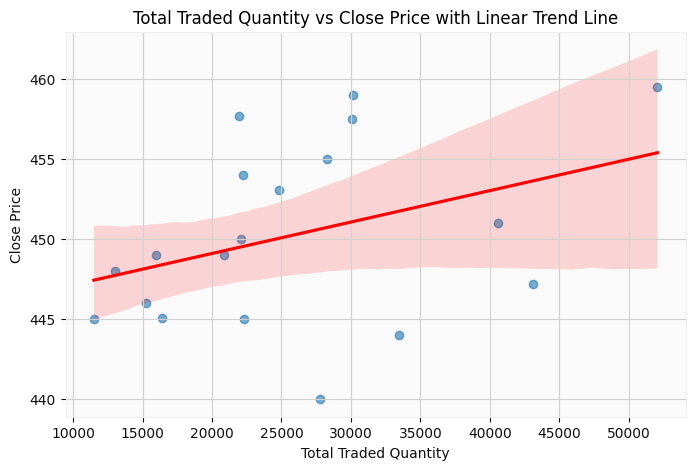

In [91]:
plt.figure(figsize=(8, 5))
sns.regplot(x=df["TOTAL TRADED QUANTITY"], y=df["CLOSE PRICE"], scatter_kws={"alpha": 0.6}, line_kws={"color": "red"})
plt.xlabel("Total Traded Quantity")
plt.ylabel("Close Price")
plt.title("Total Traded Quantity vs Close Price with Linear Trend Line")
plt.show()

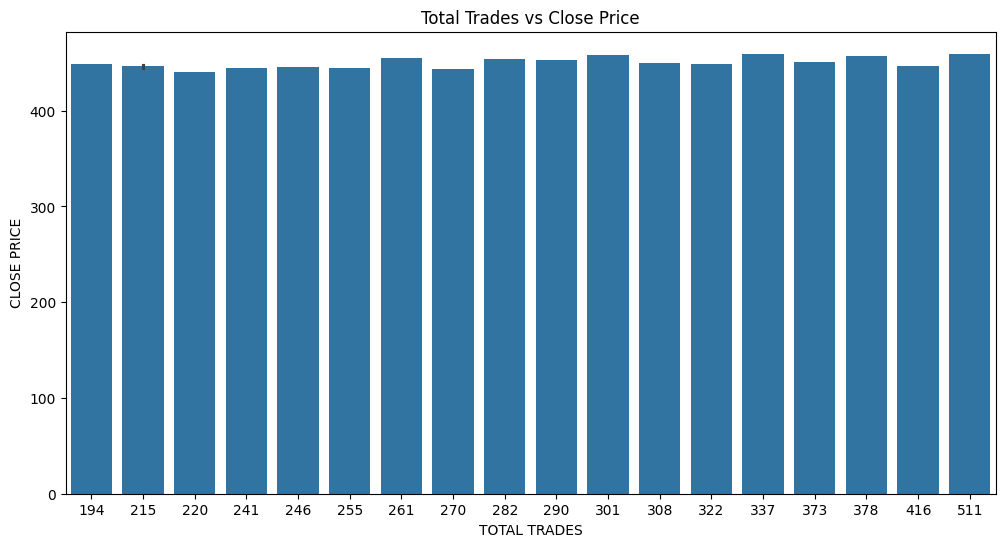

In [53]:
matplotlib.rcParams['figure.figsize'] = (12, 6)
#runtime configuration is a dictionary-like object in Matplotlib where you can customize various properties, including figure size.
sns.barplot(x="TOTAL TRADES",y="CLOSE PRICE",data=df)
plt.title("Total Trades vs Close Price")
plt.show()

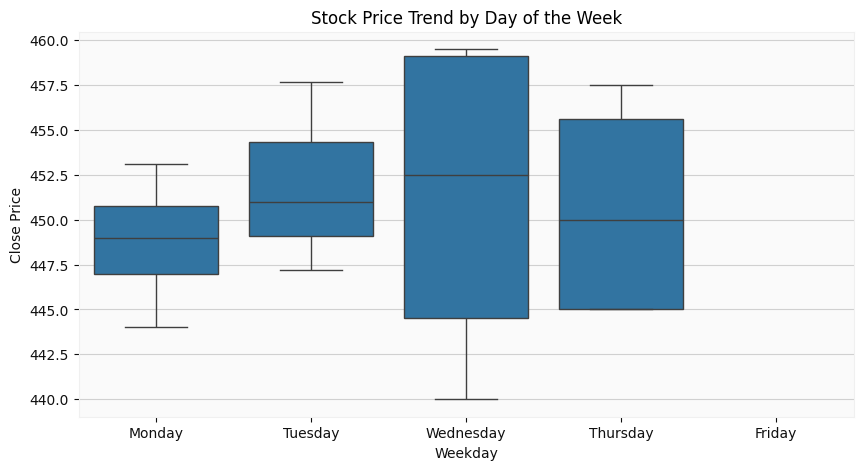

In [140]:
df["BUSINESS DATE"] = pd.to_datetime(df["BUSINESS DATE"])
df["Weekday"] = df["BUSINESS DATE"].dt.day_name()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Weekday"], y=df["CLOSE PRICE"], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.xlabel("Weekday")
plt.ylabel("Close Price")
plt.title("Stock Price Trend by Day of the Week")
plt.show()


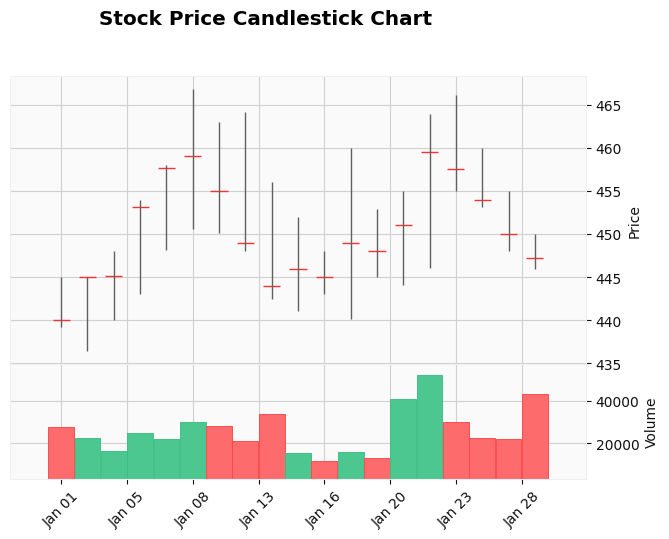

In [114]:
# Convert 'BUSINESS DATE' to datetime format
df["BUSINESS DATE"] = pd.to_datetime(df["BUSINESS DATE"])

# Sort by date in ascending order
df = df.sort_values(by="BUSINESS DATE", ascending=True)

# Rename columns for compatibility
df = df.rename(columns={
    "CLOSE PRICE": "Close",
    "HIGH PRICE": "High",
    "LOW PRICE": "Low",
    "TOTAL TRADED QUANTITY": "Volume"
})

# Add Open Prices (if missing)
df["Open"] = df["Close"]

# Set Date as Index
df.set_index("BUSINESS DATE", inplace=True)

# Plot Candlestick Chart
mpf.plot(df, type='candle', style='yahoo', volume=True, title="Stock Price Candlestick Chart")

In [121]:
# cols_for_features = ['HIGH PRICE', 'LOW PRICE', 'TOTAL TRADED QUANTITY', 'TOTAL TRADED VALUE', 'TOTAL TRADES']
# X = df[cols_for_features]

X = df.select_dtypes(include=['int64', 'float64'])
X = X.drop(columns=['CLOSE PRICE'])

y = df.loc[X.index, 'CLOSE PRICE']
# Ensures y only contains rows that exist in X. Avoids index mismatches in machine learning models.
# .loc[] is used to access specific rows and columns in a DataFrame. X.index ensures that we extract values for price only for the rows that exist in X.

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# random_state=42 ensures consistent splitting every time the code runs.

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = linear_reg.predict(X_test_scaled)
# print(y_pred)

# Evaluate Model Performance
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

# Plot actual vs predicted prices
# plt.figure(figsize=(8, 5))
# plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
# plt.plot(X_test, y_pred, color='red')
# plt.xlabel('Actual Fare')
# plt.ylabel('Predicted Fare')
# plt.title('Actual vs Predicted Flight Fares')
# plt.grid()
# plt.show()

R² Score: 0.3098
